# WiDS Datathon 2022

# 1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder


# 2. Dataset

In [2]:
def get_data(path):
    '''Read data in csv format'''
    with open (path, 'r') as datafile:
        df = pd.read_csv(datafile,  encoding=None)
        return df

In [3]:
# Read Train and Test sets

train_path = '../data/train.csv'
test_path = '../data/test.csv'

train_df = get_data(path = train_path)
test_df = get_data(path = test_path)

print('Number of train samples are',train_df.shape)
print('Number of test samples are',test_df.shape)

Number of train samples are (75757, 64)
Number of test samples are (9705, 63)


### View of the data

In [4]:
# Train
train_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [5]:
# Test
test_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


# 3. Exploratory Data Analysis

### Variable Identification

In [6]:
def get_categorical_variable(df):
    categorical_variables = []
    for col in df.columns:
        if df[col].dtype == 'O':
            categorical_variables.append(col)
    return categorical_variables


def get_continuous_variable(df):
    continuous_variables = []
    for col in df.columns:
        if df[col].dtype != 'O':
            continuous_variables.append(col)
    return continuous_variables

In [7]:
# Train set 
categorical_variabels = get_categorical_variable(train_df)
continuous_variables = get_continuous_variable(train_df)
print('Categical variables in the train samples are: ', len(categorical_variabels), '\n They include: ', categorical_variabels)
print('Continuous variables in the train samples are: ', len(continuous_variables), '\n They include: ', continuous_variables)

Categical variables in the train samples are:  3 
 They include:  ['State_Factor', 'building_class', 'facility_type']
Continuous variables in the train samples are:  61 
 They include:  ['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp', 'february_min_temp', 'february_avg_temp', 'february_max_temp', 'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp', 'august_max_temp', 'september_min_temp', 'september_avg_temp', 'september_max_temp', 'october_min_temp', 'october_avg_temp', 'october_max_temp', 'november_min_temp', 'november_avg_temp', 'november_max_temp', 'december_min_temp', 'december_avg_temp', 'december_max_temp', 'cooling_degree_days', 'heating_degree_days',

In [8]:
# Test set 
categorical_variabels = get_categorical_variable(test_df)
continuous_variables = get_continuous_variable(test_df)
print(f'Categical variables in the test samples are: ', len(categorical_variabels), '\n They include: ', categorical_variabels)
print(f'Continuous variables in the test samples are: ', len(continuous_variables), '\n They include: ', continuous_variables)

Categical variables in the test samples are:  3 
 They include:  ['State_Factor', 'building_class', 'facility_type']
Continuous variables in the test samples are:  60 
 They include:  ['Year_Factor', 'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION', 'january_min_temp', 'january_avg_temp', 'january_max_temp', 'february_min_temp', 'february_avg_temp', 'february_max_temp', 'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp', 'august_max_temp', 'september_min_temp', 'september_avg_temp', 'september_max_temp', 'october_min_temp', 'october_avg_temp', 'october_max_temp', 'november_min_temp', 'november_avg_temp', 'november_max_temp', 'december_min_temp', 'december_avg_temp', 'december_max_temp', 'cooling_degree_days', 'heating_degree_days', '

### Basic Statistics

In [9]:
# basic stats of features
train_df.describe().style.background_gradient(cmap="Blues")

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,75757.000000,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,165983.865858,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,58.486278,21.606281,44.469292,70.897831,32.037171,53.784863,82.661932,44.706179,63.742547,88.987856,51.131763,71.066384,91.400280,60.571604,76.596879,95.543950,58.515068,75.348749,92.572581,50.791689,69.597545,92.171139,38.210911,58.727038,81.135671,28.630397,48.123133,71.202397,22.736777,41.625569,64.496852,1202.250446,4324.957390,42.430651,29.136379,164.862455,56.176705,48.756511,17.447932,4.886532,0.876764,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,246875.790940,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,8.414611,10.004303,6.657142,7.680982,5.577279,2.500473,4.101028,4.200319,2.792919,2.864669,3.415926,2.861681,3.604068,4.177109,4.090275,4.157118,4.441992,3.818895,4.139685,4.290884,3.603773,5.011708,5.093899,2.641300,5.579513,7.153244,4.094207,4.373374,9.014047,5.869386,6.054104,391.561780,824.366727,10.592205,17.810894,175.275869,2.241940,27.587124,14.469435,7.071221,2.894244,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,943.000000,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,38.000000,-9.000000,25.854839,53.000000,15.000000,40.280000,62.000000,23.000000,46.950000,64.000000,30.000000,54.100000,67.000000,37.000000,54.822581,65.000000,31.000000,56.693548,66.000000,26.000000,53.600000,64.000000,18.000000,44.693548,59.000000,4.000000,30.766667,53.000000,-16.000000,23.790323,42.000000,0.000000,398.000000,0.000000,0.000000,0.000000,44.512329,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,62379.000000,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,55.000000,13.000000,38.096774,62.000000,26.000000,52.333333,80.000000,42.000000,62.790323,88.000000,50.000000,70.983333,89.000000,57.000000,76.145161,95.000000,57.000000,74.516129,90.000000,47.000000,68.200000,91.000000,35.000000,58.048387,78.000000,23.000000,45.250000,69.000000,17.000000,38.532258,60.000000,1128.000000,3978

In [10]:
# basic stats of features
test_df.describe().style.background_gradient(cmap="Blues")

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
count,9705.000000,9705.000000,9613.000000,7451.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,1130.000000,1130.000000,1130.000000,588.000000,9705.000000
mean,7.000000,163214.325162,1963.219598,64.712924,205.231190,13.520762,36.678081,60.008449,21.705100,41.634886,66.940958,23.146419,43.568863,71.160639,34.715920,54.208665,78.395775,38.720041,59.170865,87.359093,45.991860,67.560717,93.926945,53.061721,71.433595,89.392581,52.151984,70.449585,90.545183,45.989490,66.947623,93.104894,36.179907,57.384655,80.440392,25.163627,44.772780,67.195878,14.127357,36.065571,60.251726,733.361875,4565.202061,41.586885,8.532066,17.275631,54.210939,54.256054,20.443895,5.371561,1.323029,66.820093,11.941267,0.211643,0.000000,321.743363,310.194690,18.131327,150.755102,80609.000000
std,0.000000,262475.879577,40.819953,27.935984,264.822814,12.458365,6.968520,5.874699,9.774624,5.528689,6.397885,11.553421,6.321471,9.369843,5.395467,4.162475,9.263683,5.956980,2.729821,4.449191,3.500417,4.890466,1.758773,2.843906,5.391688,5.116091,4.540679,3.079811,1.815490,5.158683,2.330802,4.247122,4.645734,4.163043,6.501742,8.502825,6.270954,6.215263,16.447838,8.112306,4.538741,452.168118,1165.539843,7.031357,9.234709,32.895419,3.466536,42.259933,23.182254,6.676871,2.205729,30.936872,13.077936,0.615250,0.000000,19.127690,38.969875,1.993348,58.760576,2801.736515
min,7.000000,5982.000000,0.000000,1.000000,1.800000,-1.000000,27.548387,42.000000,9.000000,33.428571,52.000000,8.000000,35.935484,53.000000,28.000000,42.766667,61.000000,30.000000,51.000000,80.000000,40.000000,55.583333,91.000000,46.000000,60.467742,79.000000,46.000000,63.946429,88.000000,40.000000,58.700000,88.000000,32.000000,46.096774,65.000000,16.000000,36.850000,54.000000,-8.000000,25.919355,47.000000,110.000000,2112.000000,25.240000,0.000000,0.000000,46.073204,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,280.000000,240.000000,14.800000,34.000000,75757.000000
25%,7.000000,48020.000000,1929.000000,45.000000,26.500000,-1.000000,27.548387,54.000000,9.000000,36.053571,59.000000,12.000000,37.354839,59.000000,29.000000,50.833333,67.000000,30.000000,56.596774,82.000000,45.000000,62.583333,93.000000,51.000000,67.016129,84.000000,46.000000,69.274194,89.000000,40.000000,64.866667,90.000000,32.000000,53.177419,72.000000,16.000000,36.850000,62.000000,-8.000000,25.919355,55.000000,345.000000,3555.000000,41.060000,3.400000,6.000000,50.584022,17.000000,0.000000,0.000000,0.000000,39.000000,3.000000,0.

### Univariate Analysis

Distribution of Categorical Variables

Text(0.5, 1.0, 'Test')

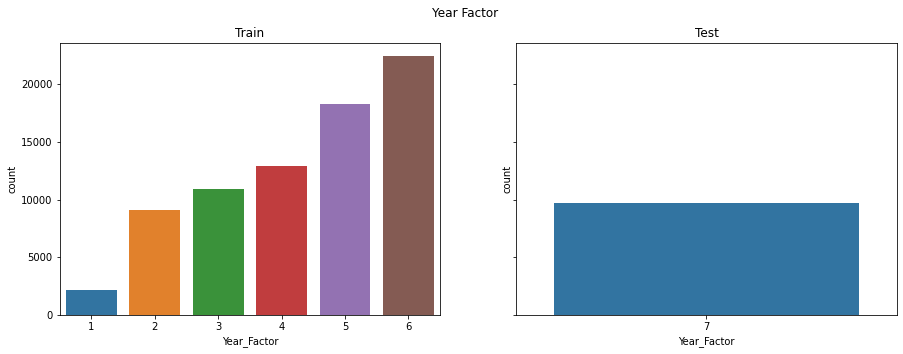

In [11]:
# Year Factor - anonymized year in which the weather and energy usage factors were observed
#count by year

fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Year Factor')


sns.countplot(ax=ax[0],x="Year_Factor",data=train_df)
ax[0].set_title('Train')

sns.countplot(ax=ax[1],x="Year_Factor",data=test_df)
ax[1].set_title('Test')

# train_df.year_built.value_counts()

Text(0.5, 1.0, 'Test')

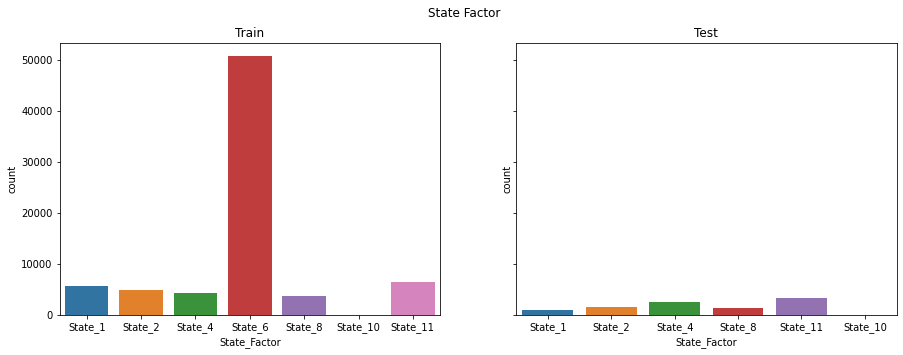

In [12]:
# State Factor

# anonymized state in which the building is located
#count by state factor

fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('State Factor')


sns.countplot(ax=ax[0],x="State_Factor",data=train_df)
ax[0].set_title('Train')

sns.countplot(ax=ax[1],x="State_Factor",data=test_df)
ax[1].set_title('Test')

Text(0.5, 1.0, 'Test')

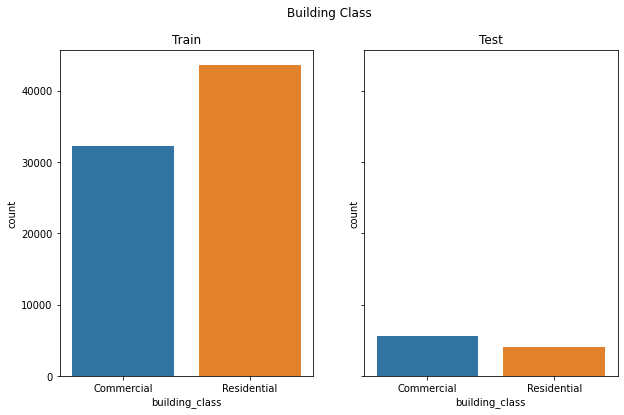

In [13]:
# Building Class

# building classification
#count by building classification

fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
fig.suptitle('Building Class')


sns.countplot(ax=ax[0],x="building_class",data=train_df)
ax[0].set_title('Train')

sns.countplot(ax=ax[1],x="building_class",data=test_df)
ax[1].set_title('Test')

In [14]:
# Facility Type - building usage type

train_df['facility_type'].nunique()

60

Text(0.5, 1.0, 'Train')

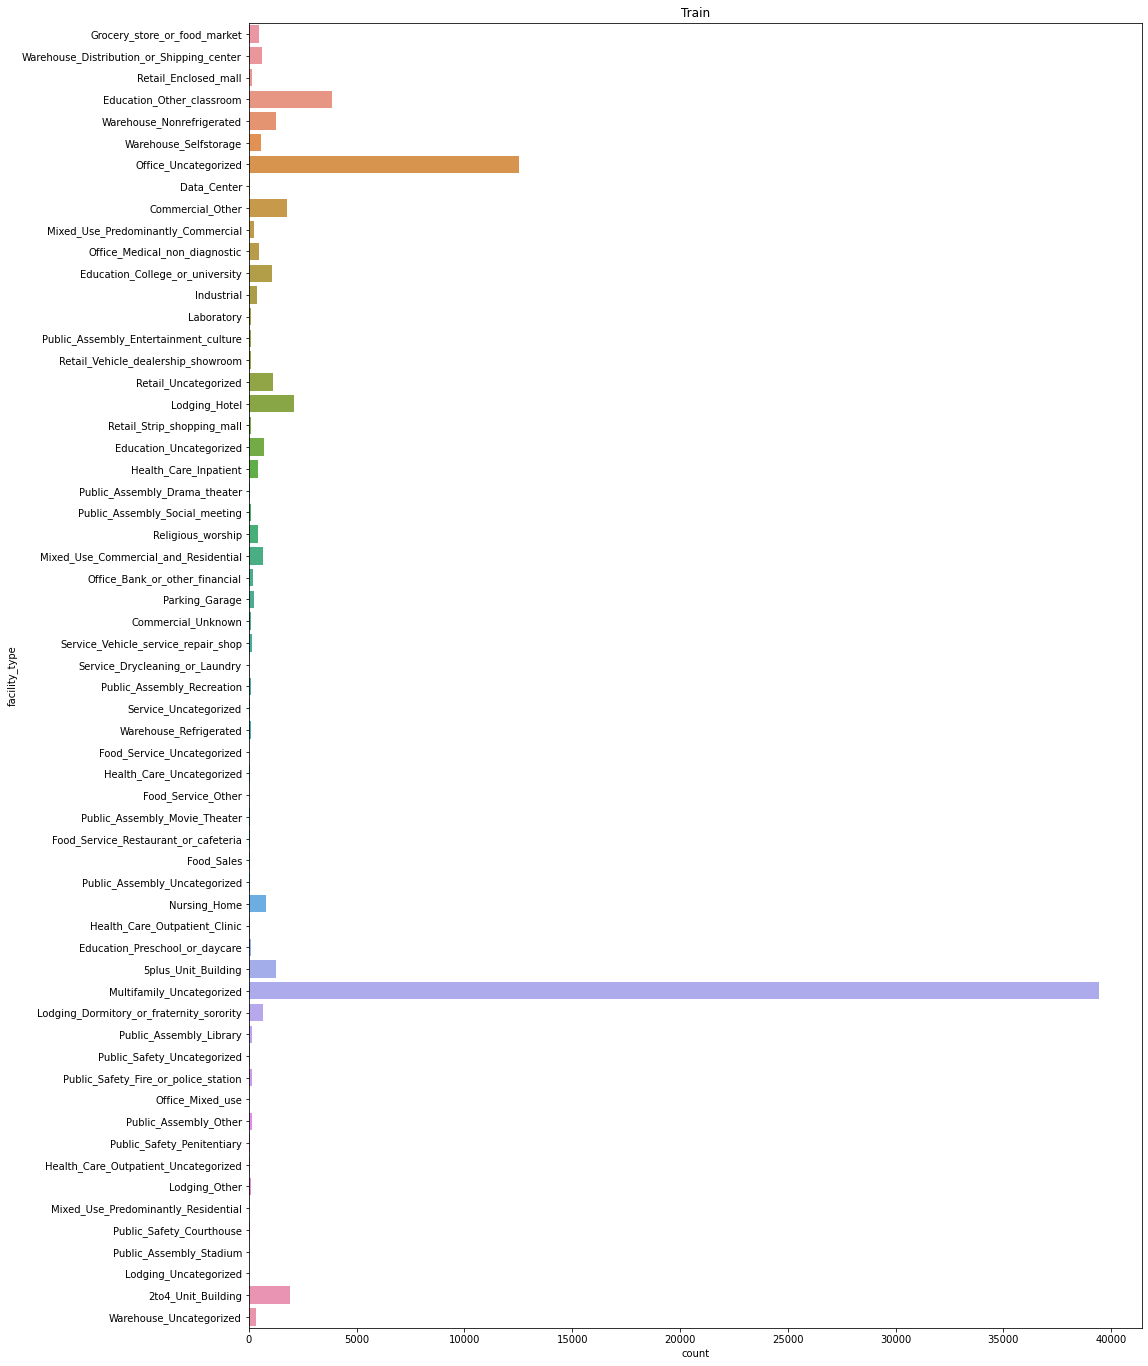

In [15]:
plt.figure(figsize=(16,24))
sns.countplot(y="facility_type",data=train_df)
plt.title('Train')

Text(0.5, 1.0, 'Test')

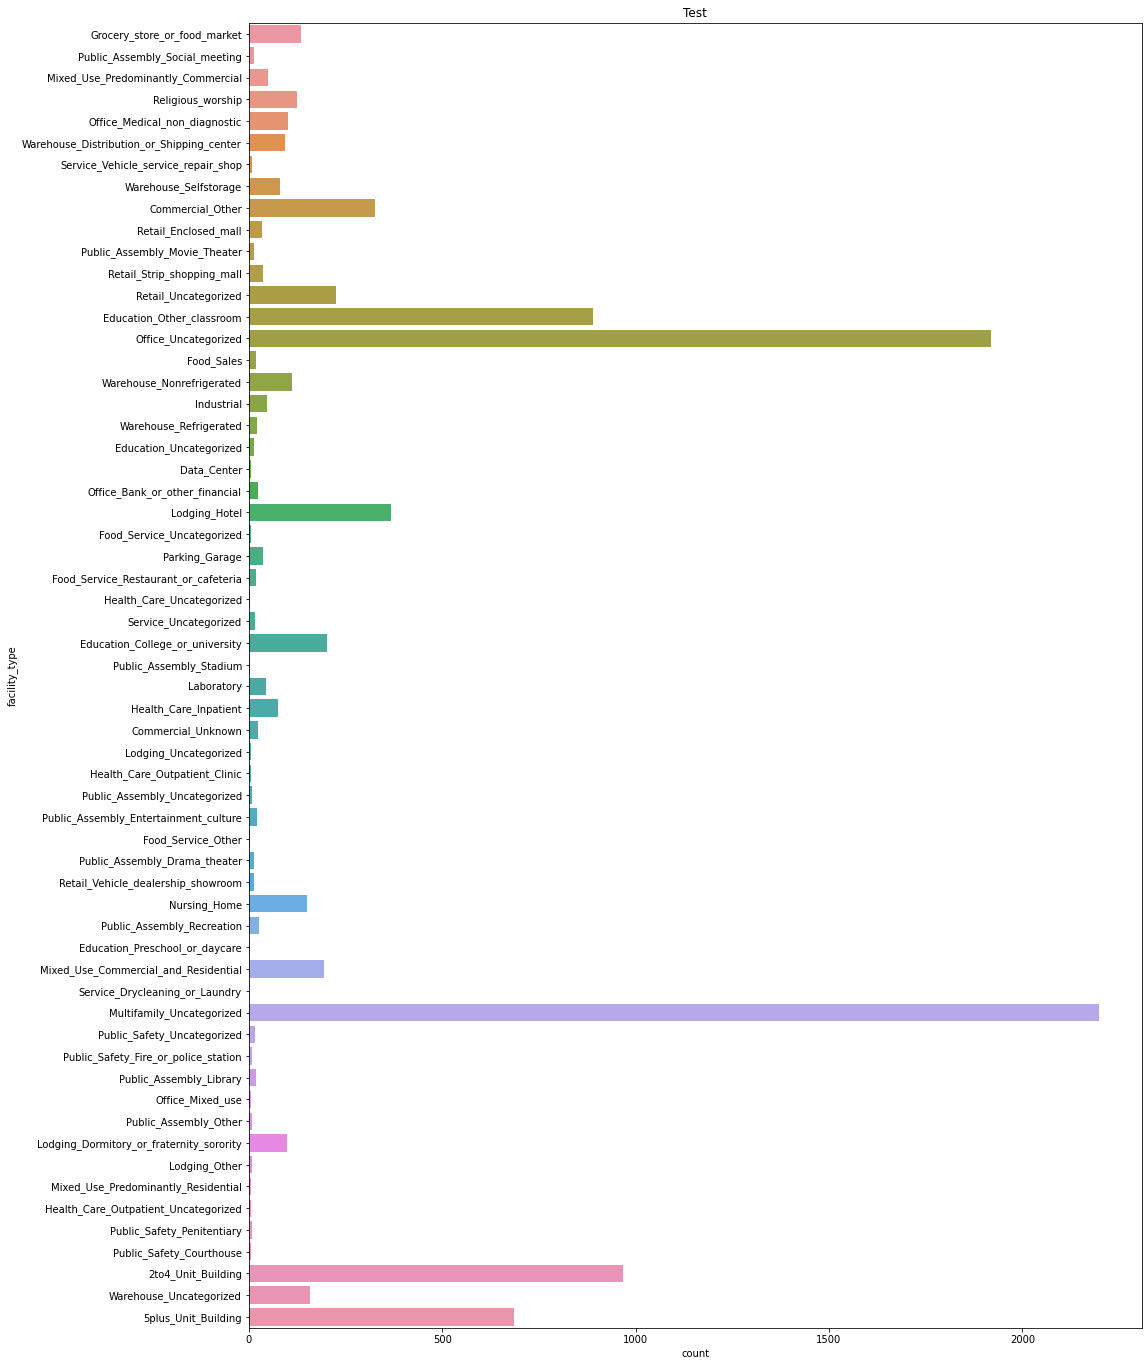

In [16]:
plt.figure(figsize=(16,24))
sns.countplot(y="facility_type",data=test_df)
plt.title('Test')

Distribution of Continuous Variables

/home/millicentochieng/anaconda3/envs/energy_env/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


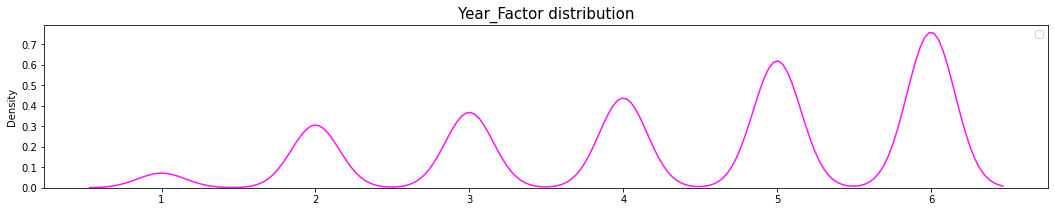

No handles with labels found to put in legend.


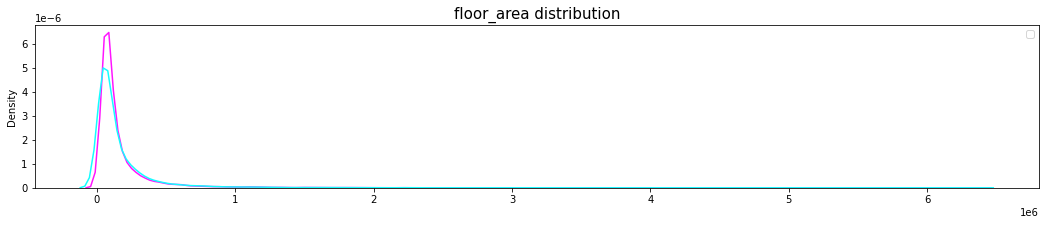

No handles with labels found to put in legend.


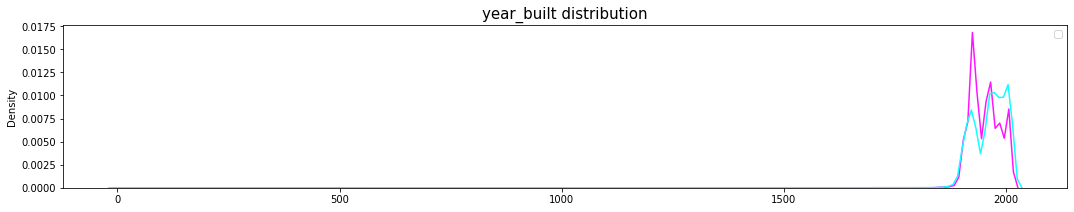

No handles with labels found to put in legend.


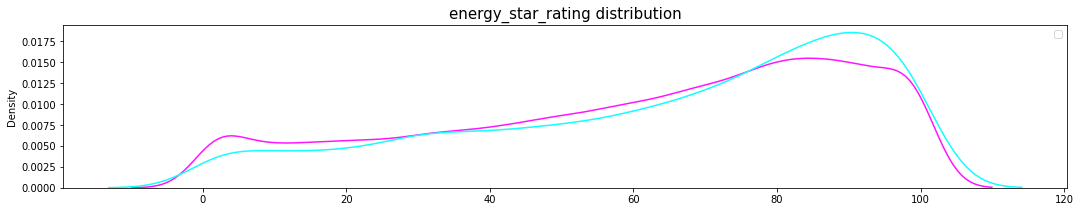

No handles with labels found to put in legend.


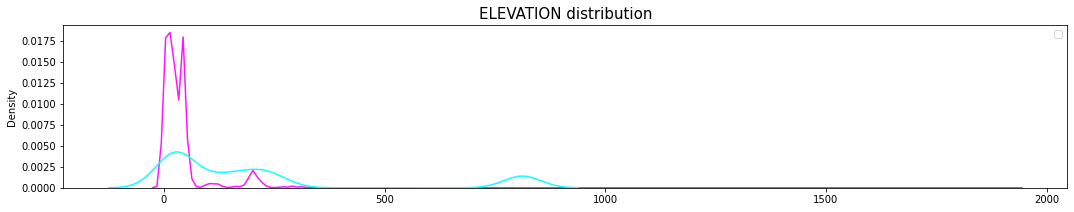

No handles with labels found to put in legend.


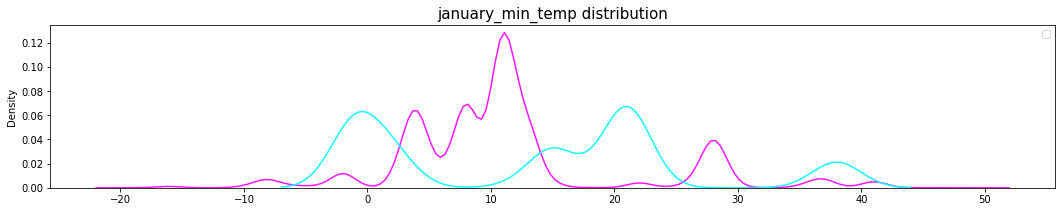

No handles with labels found to put in legend.


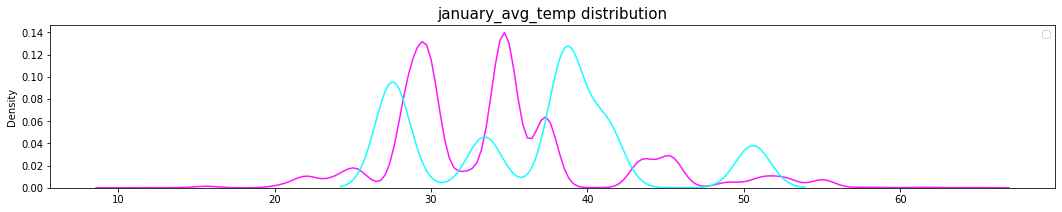

No handles with labels found to put in legend.


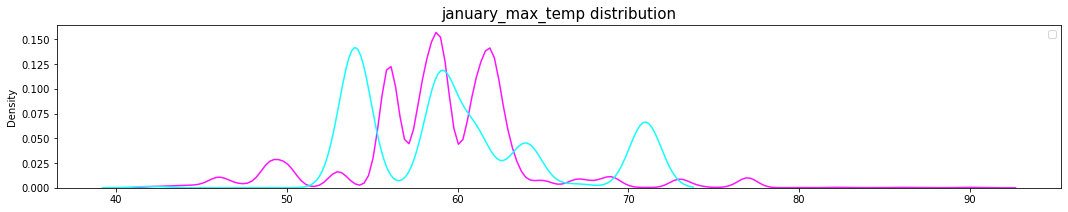

No handles with labels found to put in legend.


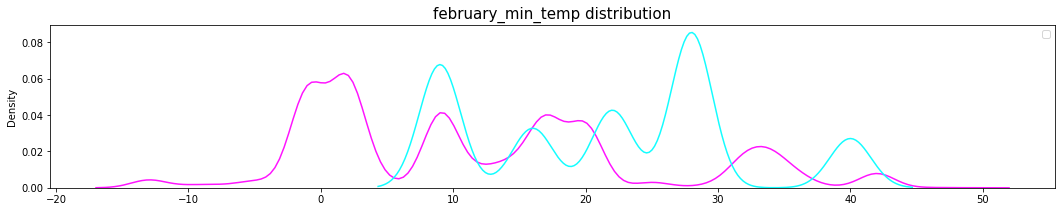

No handles with labels found to put in legend.


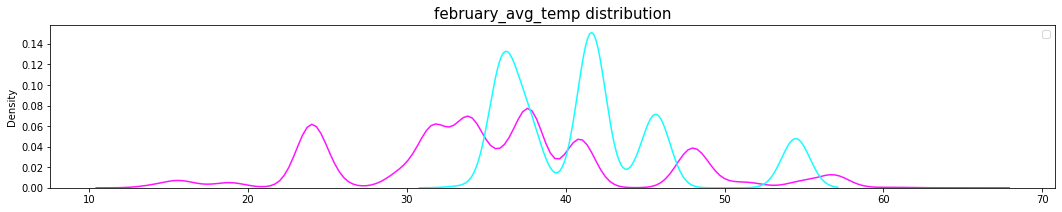

No handles with labels found to put in legend.


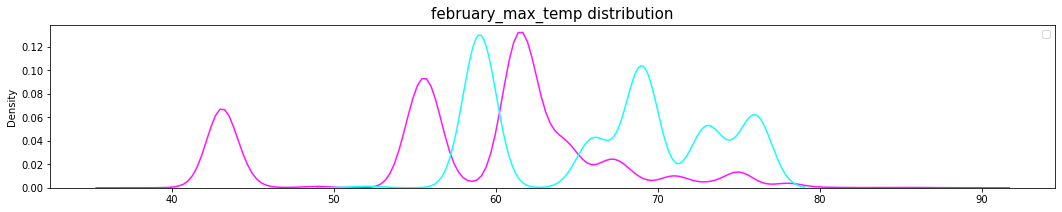

No handles with labels found to put in legend.


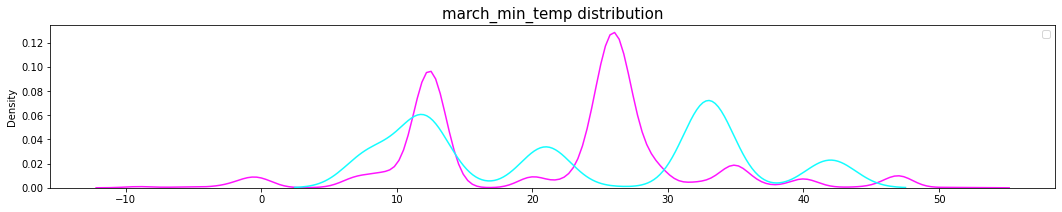

No handles with labels found to put in legend.


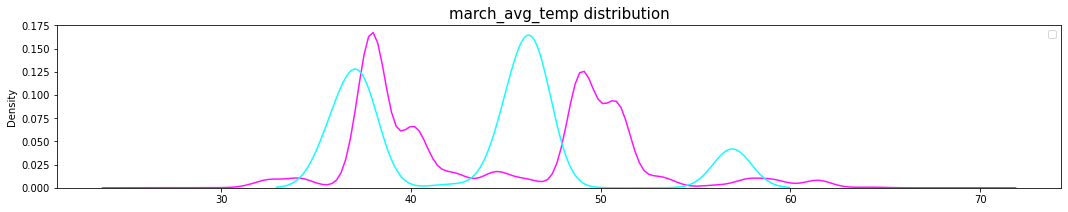

No handles with labels found to put in legend.


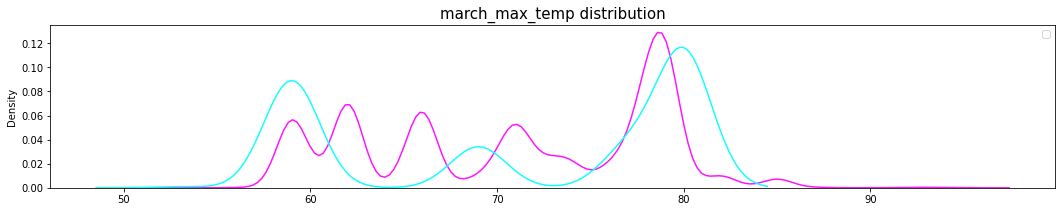

No handles with labels found to put in legend.


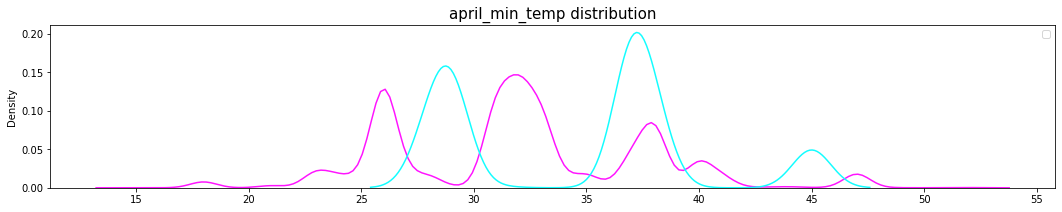

No handles with labels found to put in legend.


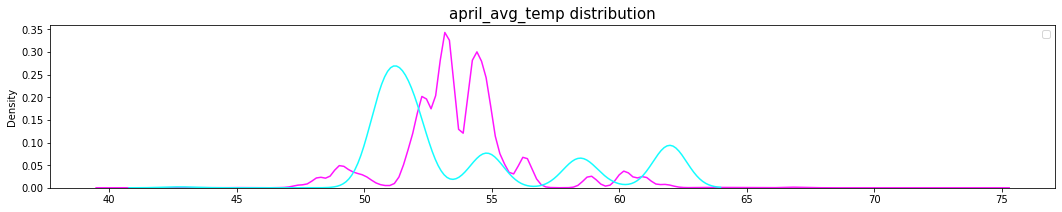

No handles with labels found to put in legend.


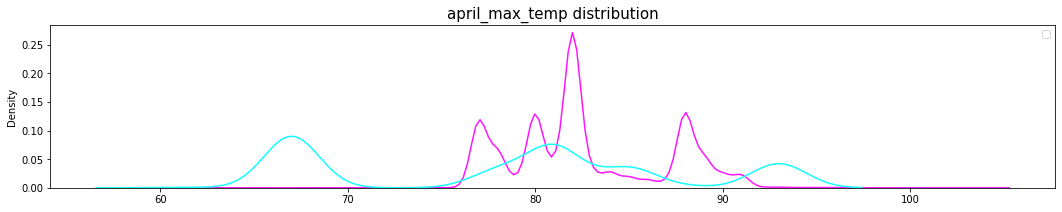

No handles with labels found to put in legend.


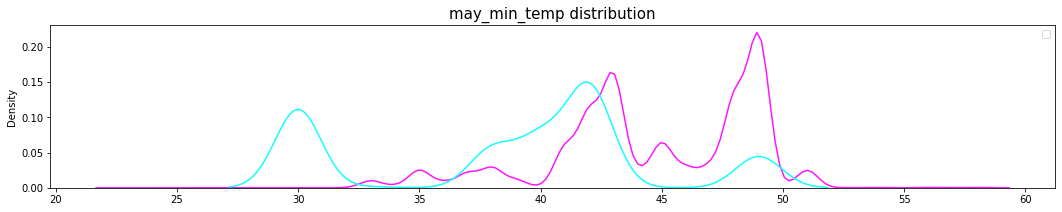

No handles with labels found to put in legend.


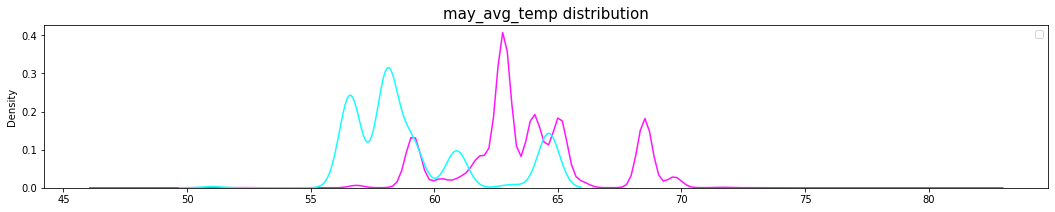

No handles with labels found to put in legend.


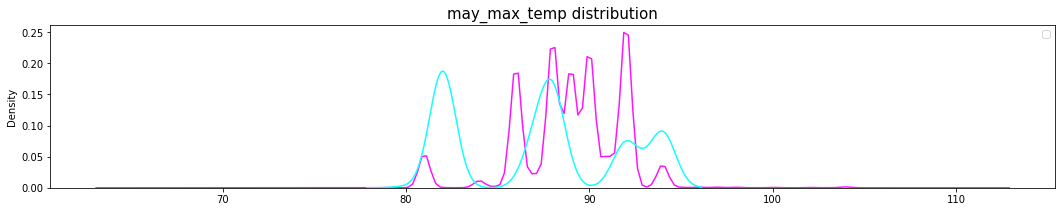

No handles with labels found to put in legend.


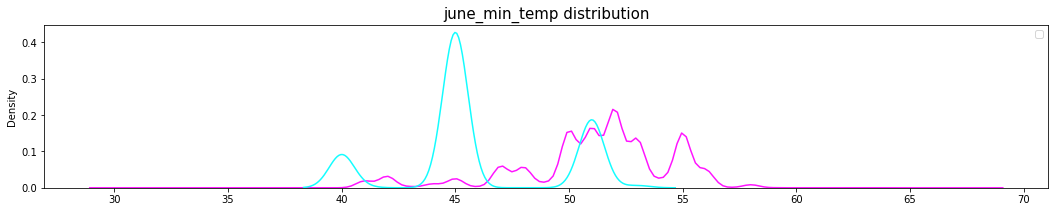

No handles with labels found to put in legend.


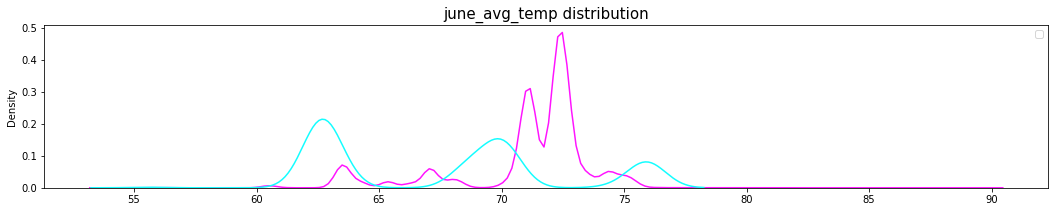

No handles with labels found to put in legend.


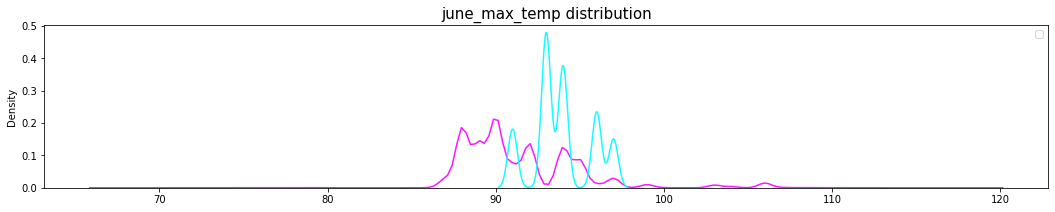

No handles with labels found to put in legend.


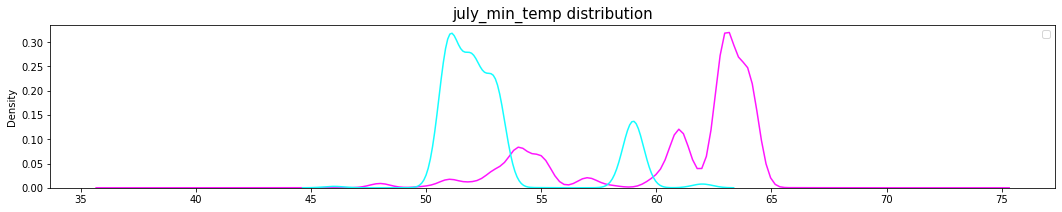

No handles with labels found to put in legend.


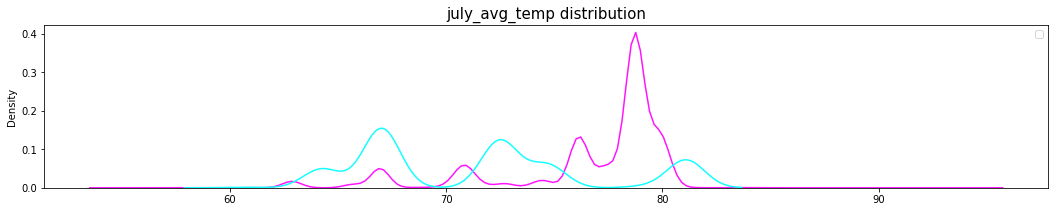

No handles with labels found to put in legend.


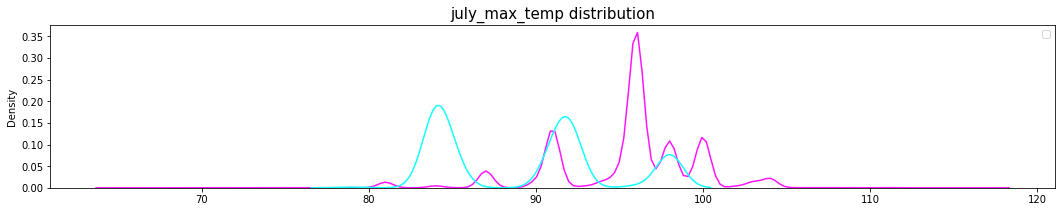

No handles with labels found to put in legend.


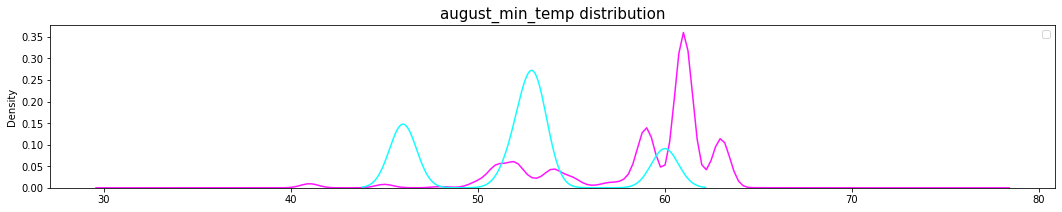

No handles with labels found to put in legend.


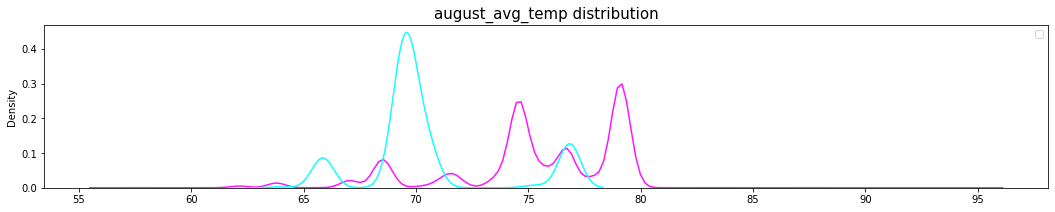

No handles with labels found to put in legend.


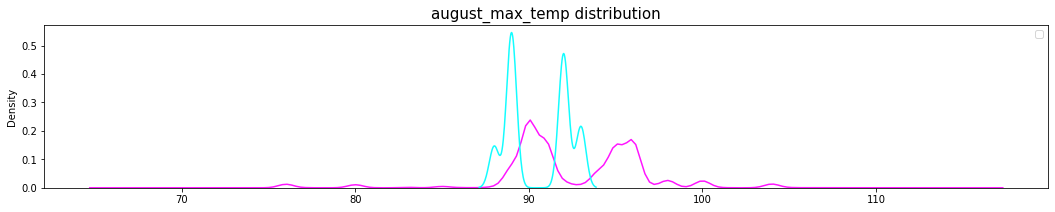

No handles with labels found to put in legend.


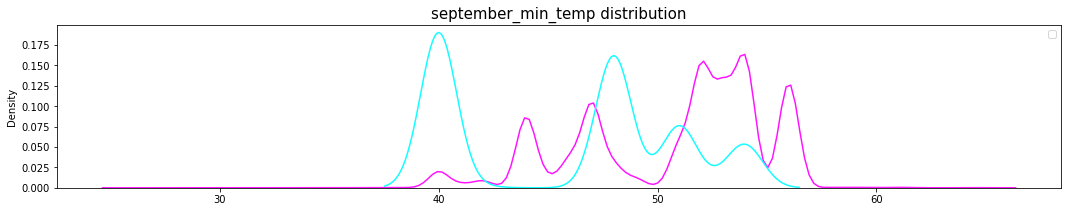

No handles with labels found to put in legend.


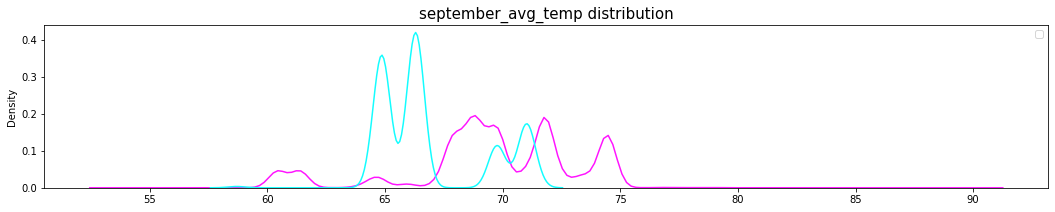

No handles with labels found to put in legend.


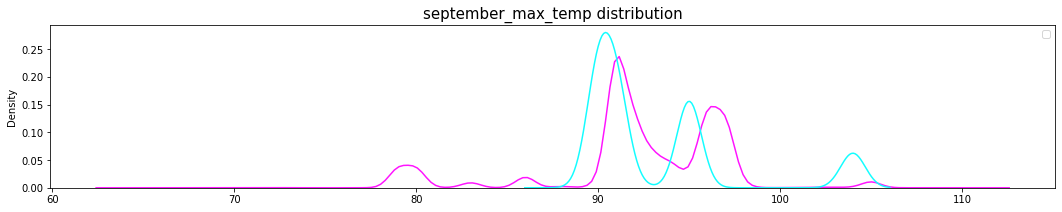

No handles with labels found to put in legend.


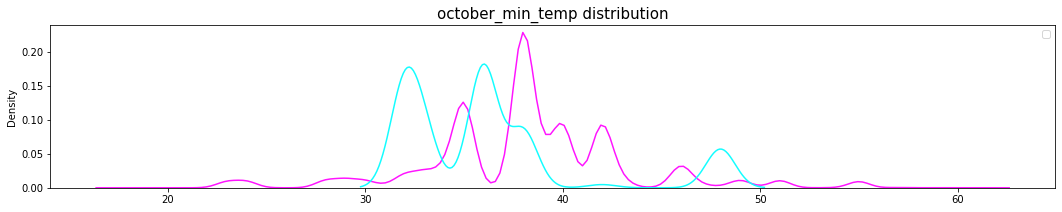

No handles with labels found to put in legend.


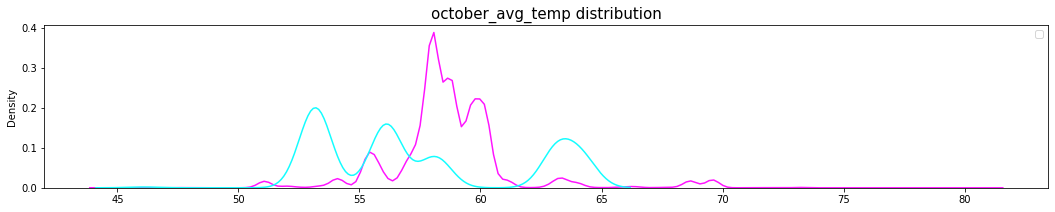

No handles with labels found to put in legend.


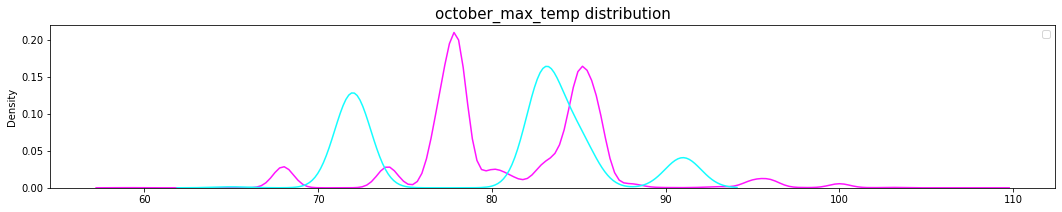

No handles with labels found to put in legend.


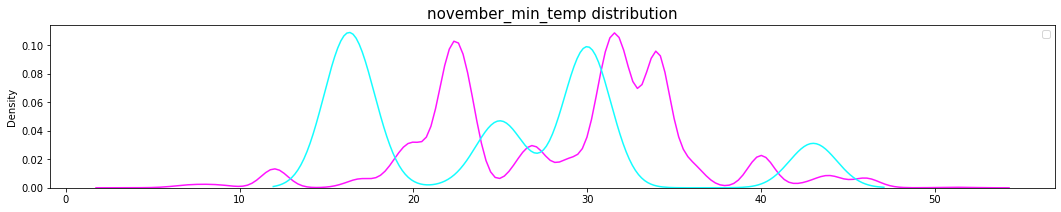

No handles with labels found to put in legend.


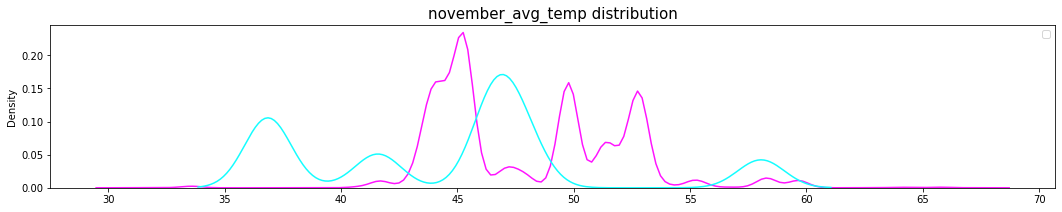

No handles with labels found to put in legend.


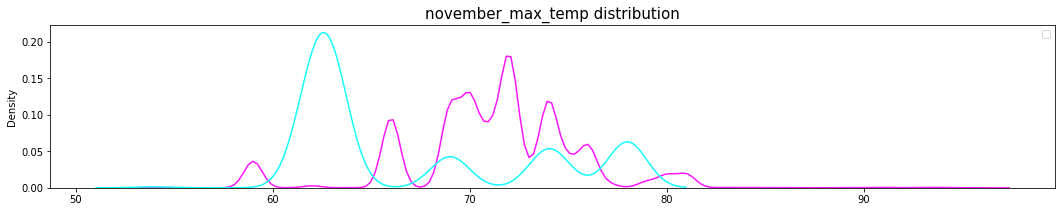

No handles with labels found to put in legend.


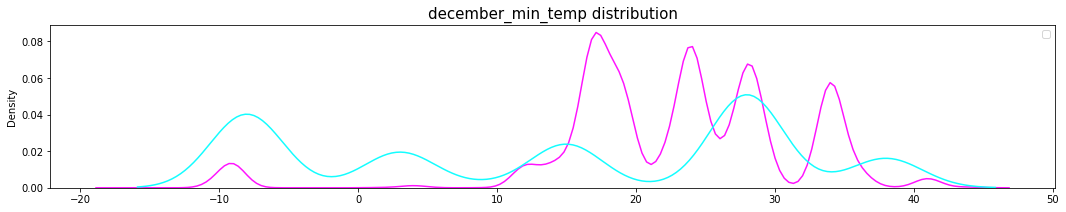

No handles with labels found to put in legend.


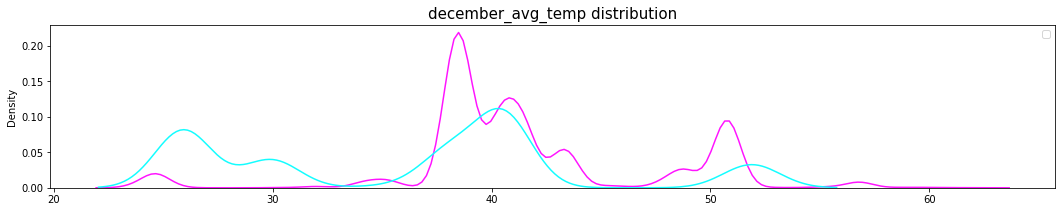

No handles with labels found to put in legend.


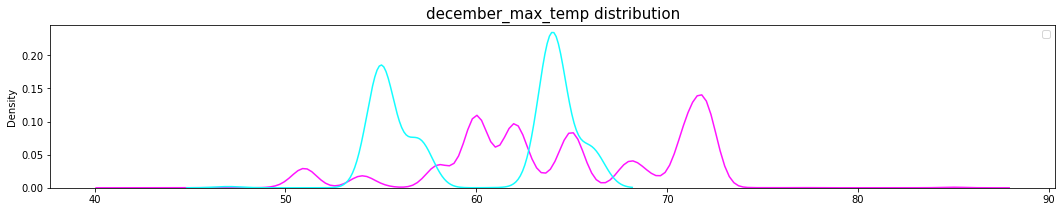

No handles with labels found to put in legend.


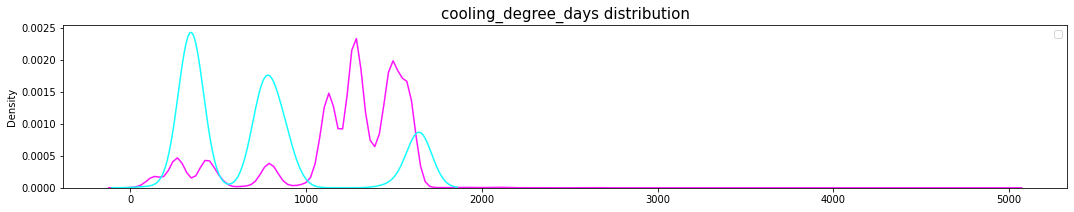

No handles with labels found to put in legend.


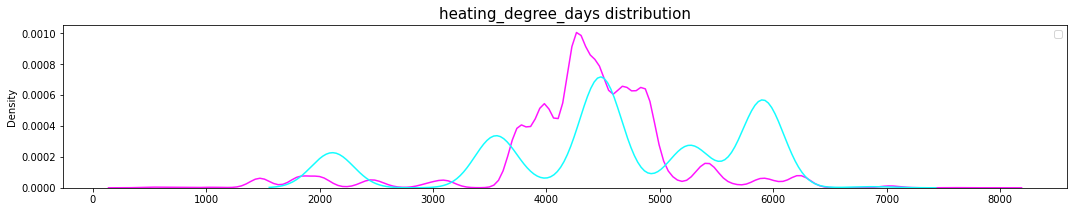

No handles with labels found to put in legend.


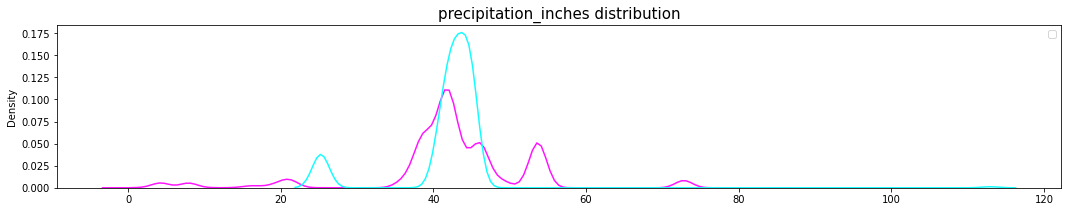

No handles with labels found to put in legend.


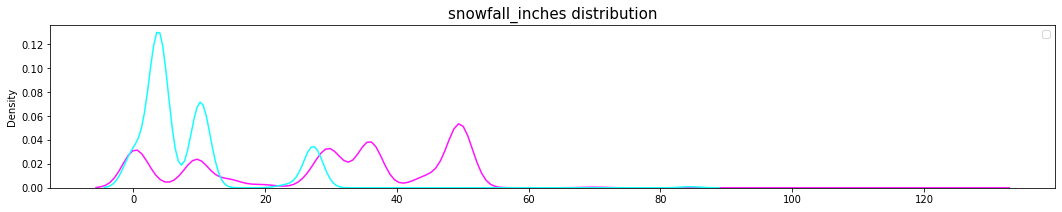

No handles with labels found to put in legend.


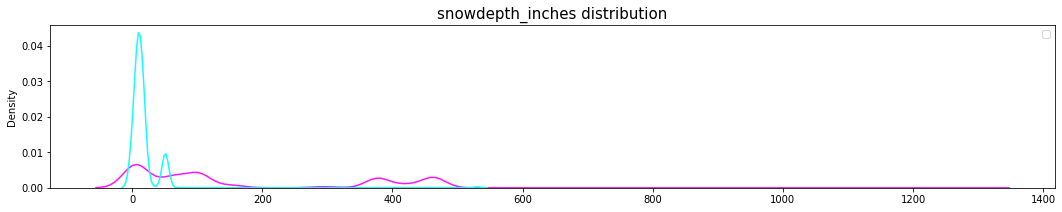

No handles with labels found to put in legend.


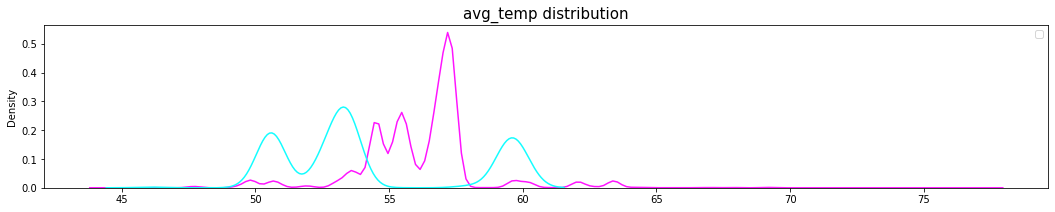

No handles with labels found to put in legend.


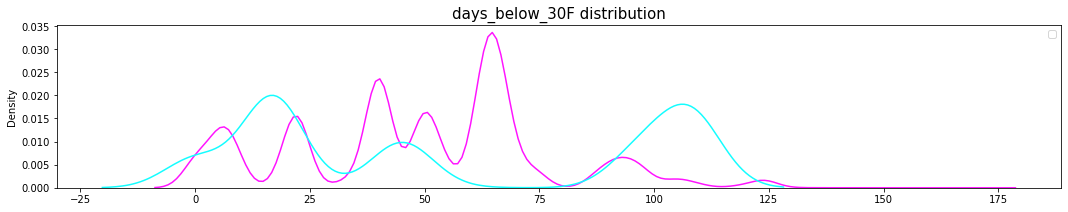

No handles with labels found to put in legend.


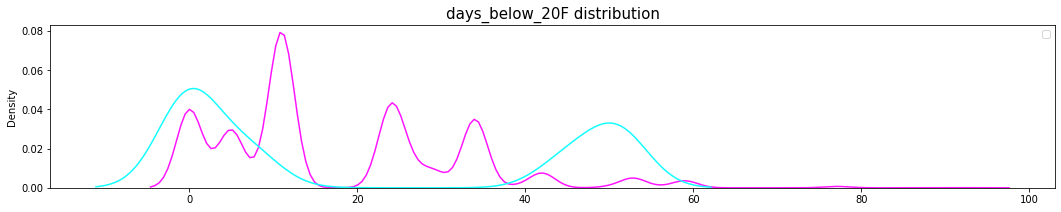

No handles with labels found to put in legend.


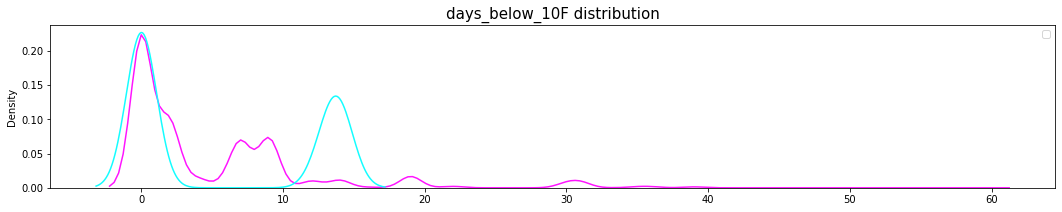

No handles with labels found to put in legend.


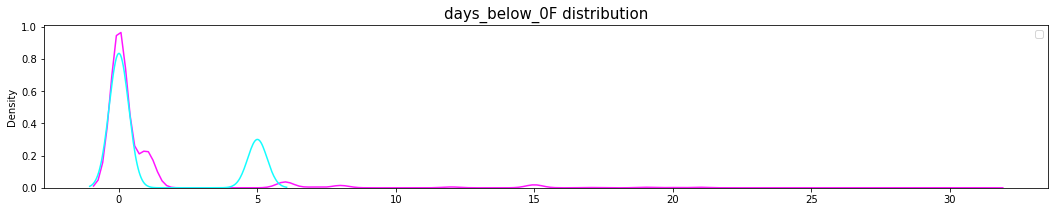

No handles with labels found to put in legend.


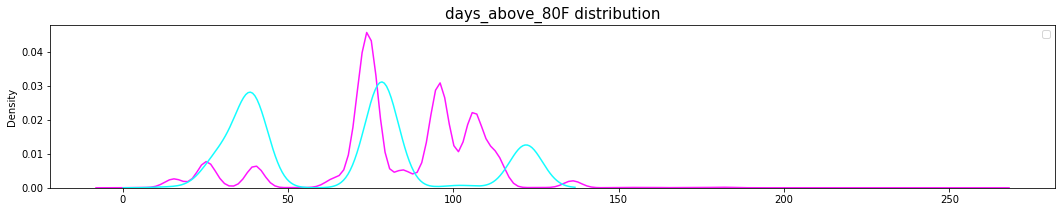

No handles with labels found to put in legend.


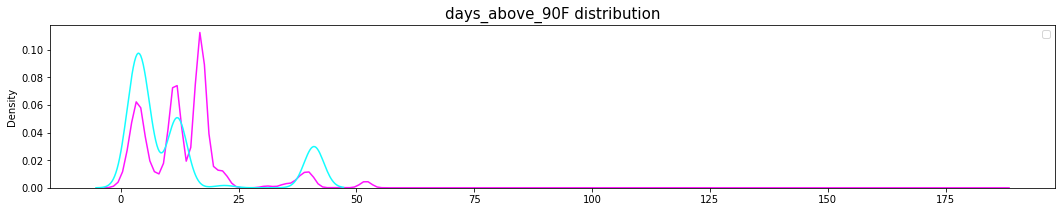

No handles with labels found to put in legend.


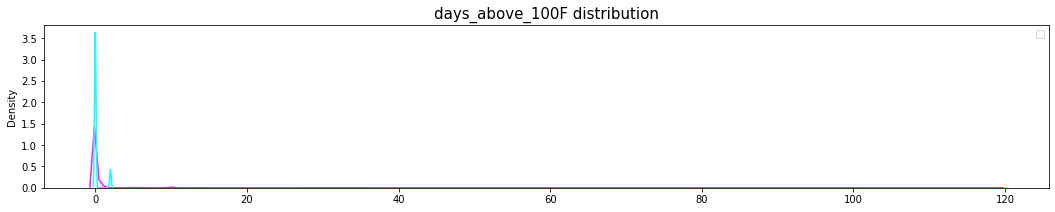

/home/millicentochieng/anaconda3/envs/energy_env/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


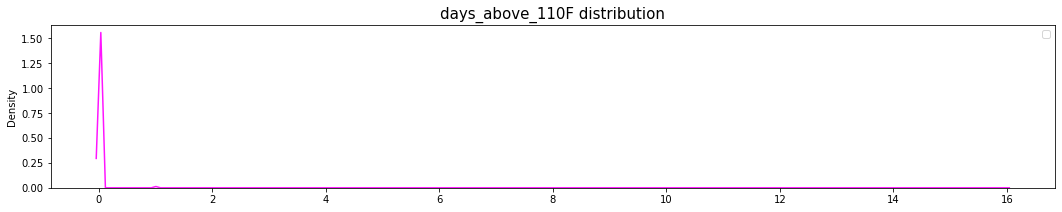

No handles with labels found to put in legend.


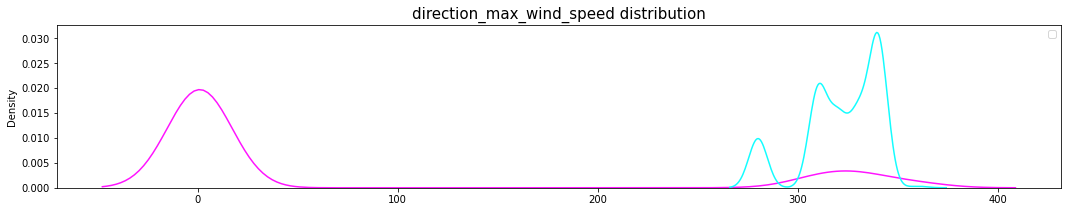

No handles with labels found to put in legend.


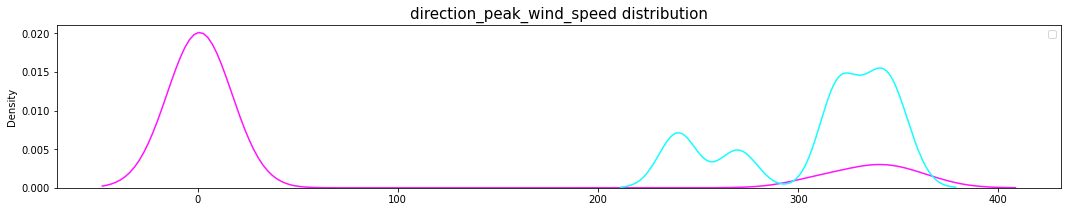

No handles with labels found to put in legend.


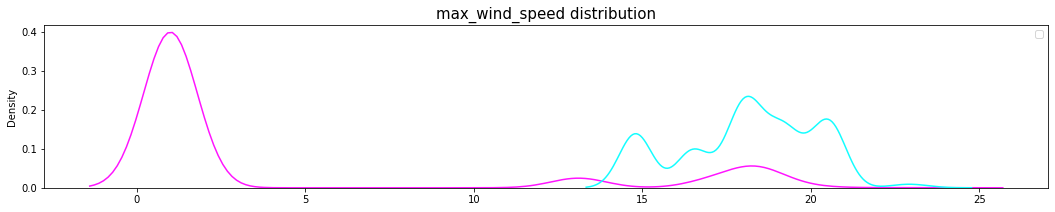

No handles with labels found to put in legend.


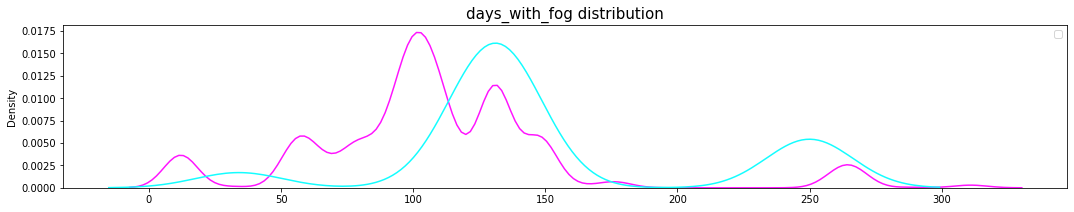

No handles with labels found to put in legend.


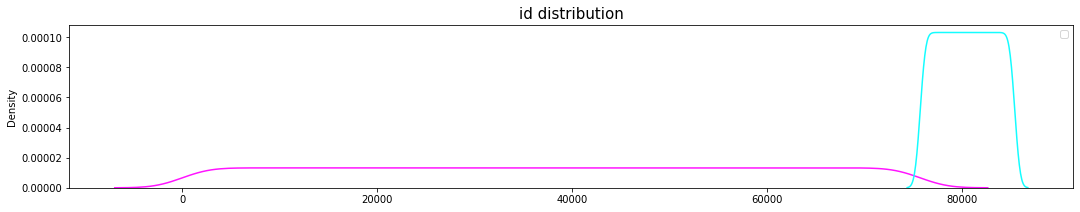

In [17]:
def kdeplot_features(df_train,df_test, feature, title):
    '''Takes a column from the dataframe and plots the distribution (after count).'''
    
    values_train = df_train[feature].to_numpy()
    values_test = df_test[feature].to_numpy()  
     
    plt.figure(figsize = (18, 3))
    
    sns.kdeplot(values_train, color = '#ff14ff')
    sns.kdeplot(values_test, color = '#14fdff')
    
    plt.title(title, fontsize=15)
    plt.legend()
    plt.show();


    del values_train , values_test


# plot distributions of features
for feature in continuous_variables:
    if feature != "site_eui":
        kdeplot_features(train_df,test_df, feature=feature, title = feature + " distribution")

### Bivariate Analysis

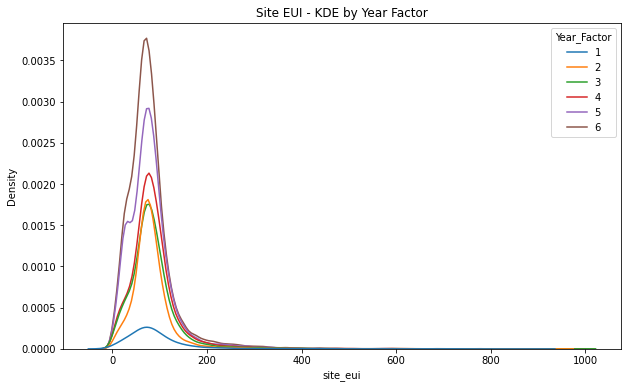

In [18]:
#Site EUI - KDE by Year Factor

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="site_eui",data=train_df,hue='Year_Factor',palette="tab10")
plt.title('Site EUI - KDE by Year Factor')
plt.show()

<AxesSubplot:xlabel='Year_Factor', ylabel='site_eui'>

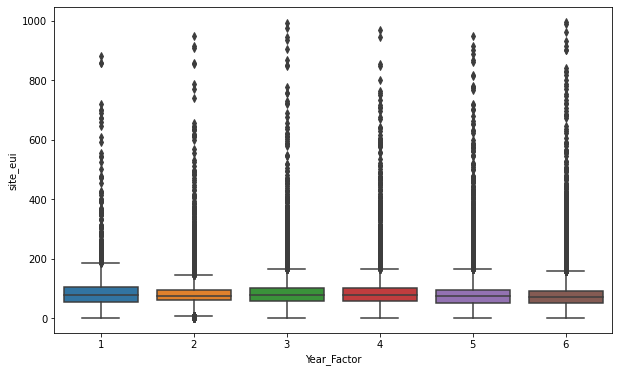

In [19]:
#Site EUI - Boxplot by Year Factor

fig = plt.figure(figsize=(10,6))
sns.boxplot(x="Year_Factor", y="site_eui", data=train_df)

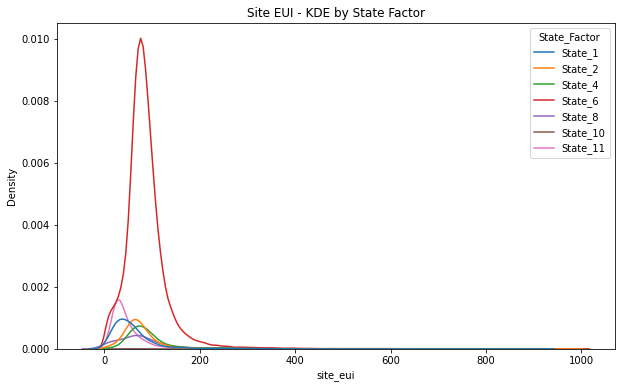

In [20]:
#Site EUI - KDE by State Factor

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="site_eui",data=train_df,hue='State_Factor',palette="tab10")
plt.title('Site EUI - KDE by State Factor')
plt.show()

<AxesSubplot:xlabel='State_Factor', ylabel='site_eui'>

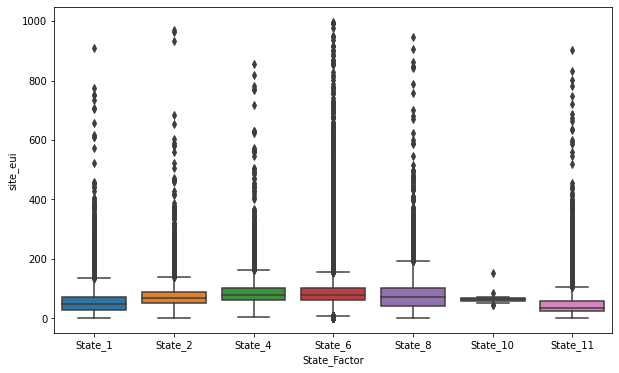

In [21]:
#Site EUI - Boxplot by State Factor

fig = plt.figure(figsize=(10,6))
sns.boxplot(x="State_Factor", y="site_eui", data=train_df)

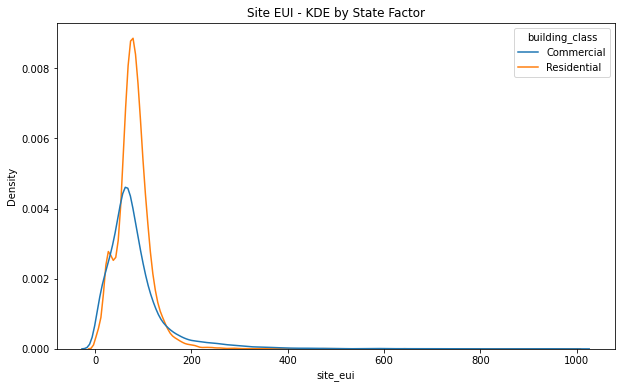

In [22]:
#Site EUI - KDE by building classification

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="site_eui",data=train_df,hue='building_class',palette="tab10")
plt.title('Site EUI - KDE by State Factor')
plt.show()

<AxesSubplot:xlabel='building_class', ylabel='site_eui'>

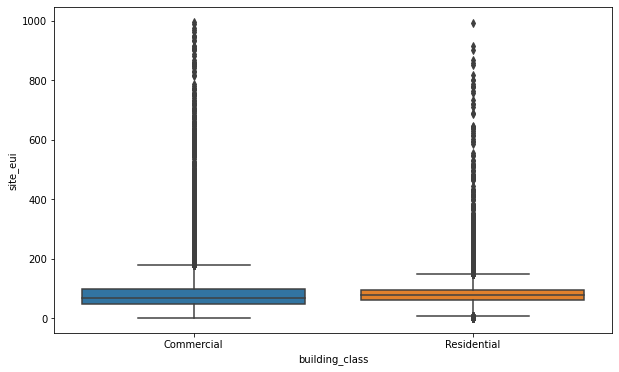

In [23]:
#Site EUI - Boxplot by building classification

fig = plt.figure(figsize=(10,6))
sns.boxplot(x="building_class", y="site_eui", data=train_df)

<AxesSubplot:xlabel='floor_area', ylabel='site_eui'>

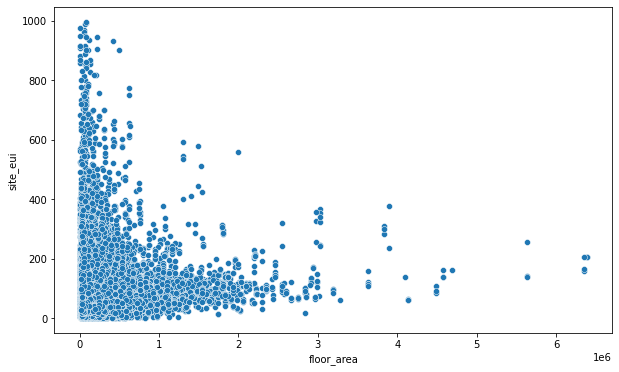

In [24]:
# Site EUI - scatter plot by floor area


fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=train_df, x="floor_area", y="site_eui")

### Encode Categorical Variables

In [25]:
le = LabelEncoder()

train_df['State_Factor']= le.fit_transform(train_df['State_Factor']).astype("uint8")
test_df['State_Factor']= le.fit_transform(test_df['State_Factor']).astype("uint8")

train_df['building_class']= le.fit_transform(train_df['building_class']).astype("uint8")
test_df['building_class']= le.fit_transform(test_df['building_class']).astype("uint8")

train_df['facility_type']= le.fit_transform(train_df['facility_type']).astype("uint8")
test_df['facility_type']= le.fit_transform(test_df['facility_type']).astype("uint8")

print(train_df['State_Factor'].unique())
print(train_df['building_class'].unique())
print(train_df['facility_type'].unique())

print(test_df['State_Factor'].unique())
print(test_df['building_class'].unique())
print(test_df['facility_type'].unique())

[0 3 4 5 6 1 2]
[0 1]
[13 55 48  6 56 58 32  4  2 25 30  5 18 19 35 51 50 21 49  8 14 34 40 47
 24 29 33  3 54 52 39 53 57 12 17 10 37 11  9 42 28 15  7  1 27 20 36 46
 44 31 38 45 16 22 26 43 41 23  0 59]
[0 3 4 5 2 1]
[0 1]
[13 40 25 47 30 55 54 58  2 48 37 49 50  6 32  9 56 18 57  8  4 29 21 12
 33 11 17 53  5 41 19 14  3 23 15 42 35 10 34 51 28 39  7 24 52 27 46 44
 36 31 38 20 22 26 16 45 43  0 59  1]


### Correlation Analysis

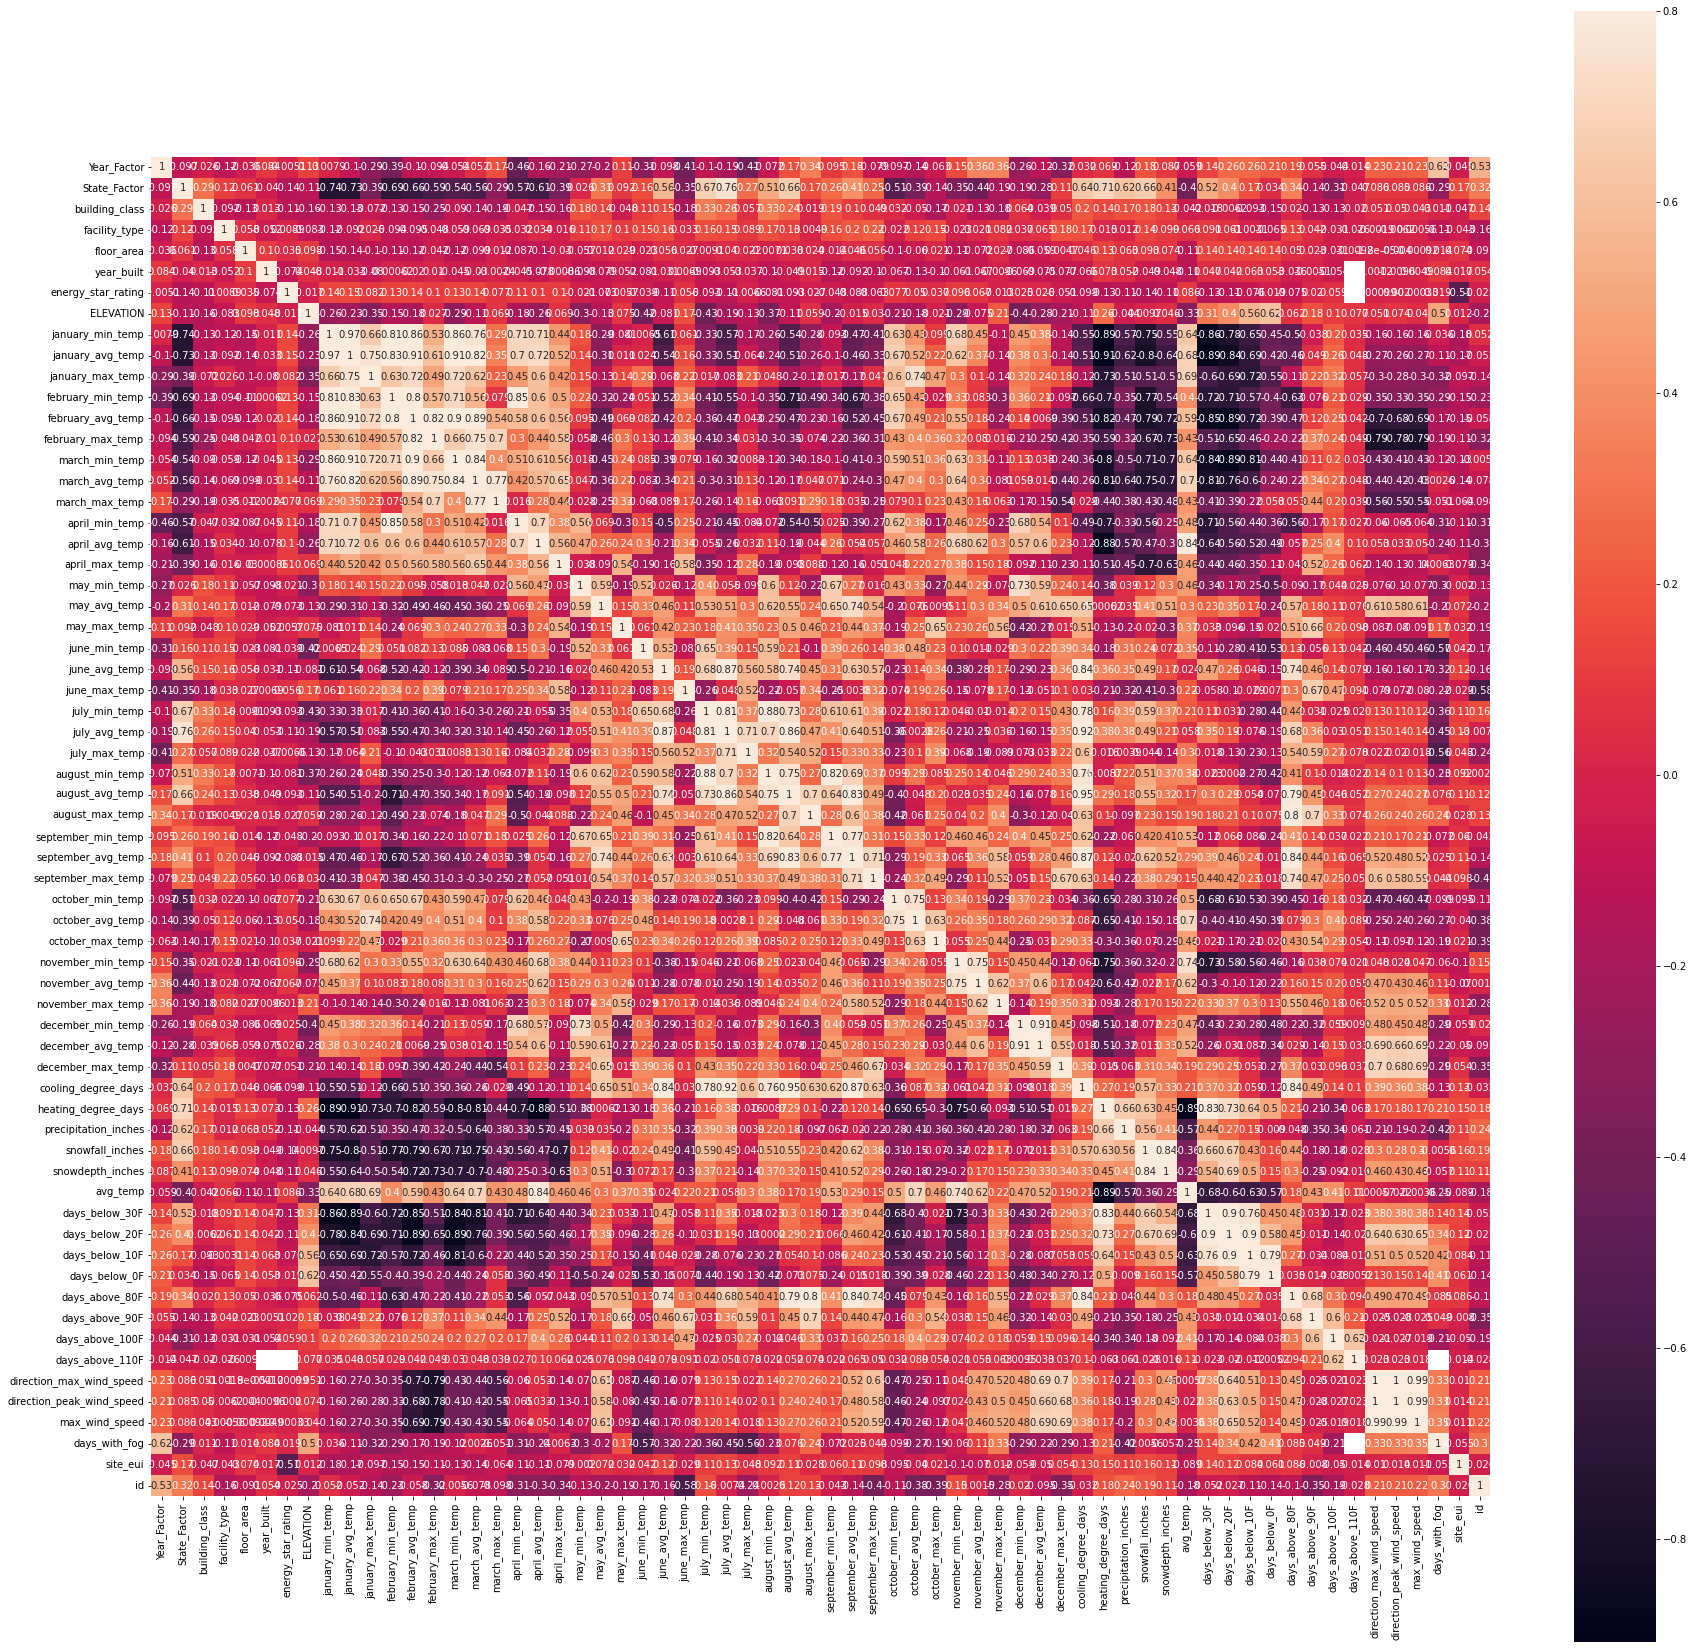

In [26]:
# Correlation Matrix Heatmap
corrmatrix = train_df.corr()
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(corrmatrix,cbar=True, annot=True, vmax=.8, square=True);

In [27]:
#Correlation with output variable
cor_target = abs(corrmatrix["site_eui"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.06]
relevant_features.sort_values(ascending=False)

site_eui                1.000000
energy_star_rating      0.511012
january_min_temp        0.179190
january_avg_temp        0.167982
State_Factor            0.165703
snowfall_inches         0.157284
february_avg_temp       0.154071
heating_degree_days     0.147861
february_min_temp       0.147348
days_below_30F          0.139811
march_avg_temp          0.135303
march_min_temp          0.134110
july_avg_temp           0.133856
cooling_degree_days     0.125004
june_avg_temp           0.122019
days_below_20F          0.119492
august_avg_temp         0.113786
precipitation_inches    0.113558
snowdepth_inches        0.113371
april_avg_temp          0.113008
april_min_temp          0.111528
september_avg_temp      0.108853
july_min_temp           0.108092
february_max_temp       0.106693
november_min_temp       0.100349
september_max_temp      0.098326
january_max_temp        0.097070
october_min_temp        0.095334
august_min_temp         0.091616
avg_temp                0.089201
days_above

### Handle Missing data

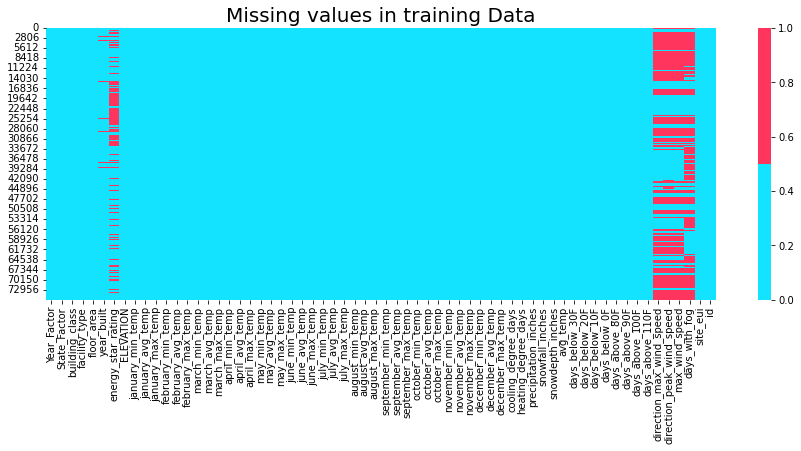

In [28]:
# Identify the missing values and Plot the missing values in the train data
plt.figure(figsize = (15,5))
sns.heatmap(train_df.isna().values, cmap = ['#14e3ff','#ff355d'], xticklabels=train_df.columns)
plt.title("Missing values in training Data", size=20);

In [29]:
def missings_(train):
    miss      = train.isnull().sum()
    miss_pct  = 100 * train.isnull().sum()/len(train)
    
    miss_pct      = pd.concat([miss,miss_pct], axis=1)
    missings_cols = miss_pct.rename(columns = {0:'Missings', 1: 'Missing pct'})
    missings_cols = missings_cols[missings_cols.iloc[:,1]!=0].sort_values('Missing pct', ascending = False).round(2)
    
    return missings_cols  

missings = missings_(train_df)
missings

,Missings,Missing pct
days_with_fog,45796,60.45
direction_peak_wind_speed,41811,55.19
direction_max_wind_speed,41082,54.23
max_wind_speed,41082,54.23
energy_star_rating,26709,35.26
year_built,1837,2.42


In [30]:
# Drop Columns with more than 50% missing data
train_df=train_df.drop(['days_with_fog','direction_peak_wind_speed', 'direction_max_wind_speed'
              ,'max_wind_speed'],1)

# year_built: replace with mode year.
train_df['year_built'] =train_df['year_built'].fillna(train_df['year_built'].mode()[0])

# replace missing values in energy_star_rating column with Median
def impute_missingness_with_median(df):
    # fill missing values with median column values
    df.fillna(df.median(), axis = 0, inplace = True, )
    return df

train_df = impute_missingness_with_median(train_df)
train_df.isnull().sum().sum()

/tmp/ipykernel_1749/4294546711.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_df=train_df.drop(['days_with_fog','direction_peak_wind_speed', 'direction_max_wind_speed'


0